PYCR2.png


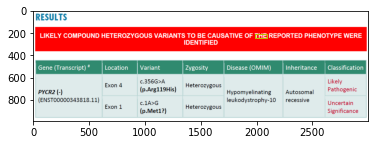

[[27, 32, 277, 61, 'RESULTS', '96.033203'], [65, 207, 191, 41, 'LIKELY', '95.594101'], [274, 207, 320, 41, 'COMPOUND', '93.253876'], [614, 207, 454, 41, 'HETEROZYGOUS', '91.044312'], [1085, 207, 277, 41, 'VARIANTS', '95.640327'], [1380, 207, 74, 41, 'TO', '95.640327'], [1474, 207, 71, 41, 'BE', '92.727707'], [1564, 207, 312, 41, 'CAUSATIVE', '90.127907'], [1896, 207, 72, 41, 'OF', '96.606995'], [1985, 207, 108, 41, 'THE', '96.147720'], [2114, 207, 298, 41, 'REPORTED', '96.553764'], [2433, 207, 332, 41, 'PHENOTYPE', '95.972244'], [2782, 207, 162, 41, 'WERE', '96.568596'], [16, 147, 2976, 223, ' ', '95.000000'], [1354, 267, 300, 41, 'IDENTIFIED', '95.871094'], [49, 492, 125, 39, 'Gene', '95.255478'], [193, 490, 279, 51, '(Transcript)', '93.264877'], [490, 485, 19, 24, '*', '90.833160'], [1367, 486, 201, 59, 'Zygosity', '91.266708'], [1740, 492, 181, 39, 'Disease', '96.263680'], [1940, 490, 190, 51, '(OMIM)', '96.231224'], [2641, 490, 316, 41, 'Classification', '96.439163'], [647, 649, 10

HTTPError: HTTP Error 403: Forbidden

In [19]:
import numpy as np
import pandas as pd
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
import os
import json
from urllib.parse import urlparse
import PIL
from PIL import Image
from skimage import io, transform
import matplotlib.pyplot as plt
import matplotlib
import cv2
from torchvision import transforms, utils
import pytesseract
from pytesseract import Output
import argparse
from Bio import Entrez
from urllib.request import urlopen

ROOT = '/Users/devpatelio/Downloads/Coding/Machine_Learning/DatumNovo/document_similarity/data/'
images = os.listdir(ROOT)

def image_text(name, root):
    image = Image.open(root+name)
    results = pytesseract.image_to_data(image, output_type=Output.DICT)

    return image, results

def get_landmarks(results):
    all_landmarks = []
    for i in range(0, len(results['text'])):
        if results['text'][i] != '':
            x = results['left'][i]
            y = results['top'][i]
            w = results['width'][i]
            h = results['height'][i]
            text = results['text'][i]
            conf = results['conf'][i]
            all_landmarks.append([x, y, w, h, text, conf])
        else:
            pass
            

    return all_landmarks


def bounding_box(test_image, test_landmark):
    fig, ax = plt.subplots()
    ax.imshow(np.asarray(test_image))
    box = matplotlib.patches.Rectangle((test_landmark[0], test_landmark[1]), test_landmark[2], test_landmark[3], linewidth=1, edgecolor='y', facecolor='none')
    ax.add_patch(box)
    plt.show()


def fetch_gene(gene_name):
    base_url = 'https://www.genecards.org/cgi-bin/carddisp.pl?gene='
    wrongs = '.()O'
    for char in wrongs:
        if char != '.':
            gene_name.replace(char, '')
        else:
            wrong_idx = gene_name.index(char)
            gene_name = gene_name[wrong_idx:]
    url = base_url + gene_name
    response = urlopen(url)
    data_json = json.loads(response.read())

    return data_json


img_idx = 0
test_image, ocr_data = image_text(images[img_idx], ROOT)
landmarks = get_landmarks(ocr_data)
test_landmark = landmarks[9]

print(images[img_idx])
bounding_box(test_image, test_landmark)
print(landmarks)

fetch_gene('ENSTO0000343818.11')





        


        
        






# results = pytesseract.image_to_data(rgb, output_type=Output.DICT)

# class GeneticsReportDataset(Dataset):
#     def __init__ (self, image_names, root, transform=None):
        






